# Application 1: Programming Process

The goal of this application is to give you a first impression of some important steps and tools in Python when
doing data science projects.

A typical data science project looks something like this (Wickham/Grolemund, 2016):

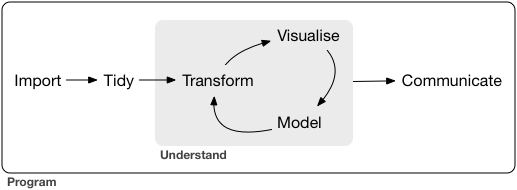

In [91]:
from IPython.display import Image
Image(filename='img/2_data_science_process.png')

## 1 Import data
First you must **import** your data into Python. This typically means that you take data stored in a file, database,
or web API, and load it into a DataFrame in Python (using Pandas).

## 2 Tidying data
Once you’ve imported your data, it is a good idea to tidy it.
**Tidying** your data means storing it in a consistent form that matches the semantics of the dataset with
the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation.
Tidy data is important because the consistent structure lets you focus your struggle on questions about the data.

## 3 Transform data
Once you have tidy data, a common first step is to transform it.
**Transformation** includes narrowing in on observations of interest
(like all people in one city, or all data from the last year), creating new variables that are functions of
 existing variables (like computing velocity from speed and time), and calculating a set of
 summary statistics (like counts or means). Together, tidying and transforming are called wrangling,
 because getting your data in a form that’s natural to work with often feels like a fight!

## 4 Visualize data
Once you have tidy data with the variables you need, there are two main engines of knowledge generation:
visualisation and modelling. These have complementary strengths and weaknesses so any real analysis
will iterate between them many times.

**Visualisation** is a fundamentally human activity. A good visualisation will show you things that
you did not expect, or raise new questions about the data. A good visualisation might also hint that
you’re asking the wrong question, or you need to collect different data.
Visualisations can surprise you, but don’t scale particularly well because they require a human to interpret them.

## 5 Models
**Models** are complementary tools to visualisation. Once you have made your questions sufficiently precise,
you can use a model to answer them. Models are a fundamentally mathematical or computational tool,
 so they generally scale well. But every model makes assumptions, and by its very nature a model cannot
 question its own assumptions. That means a model cannot fundamentally surprise you.

## 6 Communication
The last step is **communication**, an absolutely critical part of any data analysis project.
It doesn't matter how well your models and visualisation have led you to understand the data unless
you can also communicate your results to others.

---

# Programming

Surrounding all the data science steps covered above is **programming**. Programming is a cross-cutting tool that you use in every part
of the project. You don’t need to be an expert programmer to be a data scientist, but learning more about
programming pays off because becoming a better programmer allows you to automate
common tasks, and solve new problems with greater ease.

To demonstrate the programming process, we examine a dataset which contains variables that could relate to **wages**
for a group of males. The data is obtained from James et al. (2021)
and consists of 12 variables for 3,000 people, so we have n = 3,000 observations and
p = 12 variables (such as year, age, and more).

First, we take a look at some important Python modules and functions.

**Module overview:**

  * **Pandas** provides a powerful set of methods to manipulate, filter, group, and
transform data. To learn more about pandas, review this [short introduction to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), geared mainly for new users. You can see more complex recipes in the Cookbook.

  * **Seaborn** is a Python data visualization library.

In [92]:
# Customarily, we import as follows:
import pandas as pd
import seaborn as sns

# Settings
# seaborne standard settings
sns.set()
# show plots in jupyter
%matplotlib inline

## 1 Import data

In [93]:
# Load csv data from GitHub into pandas dataframes
ROOT = "https://raw.githubusercontent.com/kirenz/datasets/master/"
DATA = "wage.csv"

df = pd.read_csv(ROOT + DATA)

### 1.1 Data inspection

Let's take a look at the variables (also called columns or features) in the data set.

In [94]:
# show the first rows (i.e. head of the DataFrame)
df.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [95]:
# show the last rows (i.e. tail of the DataFrame)
df.tail()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
2995,376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
2999,453557,2009,55,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


In [96]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [97]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


## 2 Tidying data

The variable "Unnamed: 0" seems to be some kind of identification number per employee. Let's rename the variable
and check if we have duplicates in our dataset.

In [98]:
# rename variable "Unnamed: 0" to "id"
df = df.rename(index=str, columns={"Unnamed: 0": "id"})

In Jupyter, we have several options to present output. One way is to just run a cod block
which produces only one output:

In [99]:
# show the length of the variable id (i.e. the number of observations)
len(df["id"])

3000

If we need to present multiple outputs or add some text, we can use the print()
function. See the [Python documentation](https://docs.python.org/3/tutorial/inputoutput.html) for the
different `print()` options.

In [100]:
# check for duplicates and print results (if the two numbers match, we have no duplicates)
# show the length of the variable id (i.e. the number of observations)
print("IDs:", len(df["id"]))

# count the number of individual id's
print("Unique IDs:", len(df["id"].value_counts()))

IDs: 3000
Unique IDs: 3000


Suppose we already decided to only use a specific set of variables (`wage`, `year`, `age` and `education`), we can select them
and drop the other variables.

Note that the variable selection process should always be based on solid theories and other insights.
We also keep the `id`-Variable to identify the observations and to be able to merge
the data with one of the dropped variables if necessary.

In [101]:
# select variables
df = df[['id','year', 'age', 'education', 'wage']]

In [102]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3000 non-null   int64  
 1   year       3000 non-null   int64  
 2   age        3000 non-null   int64  
 3   education  3000 non-null   object 
 4   wage       3000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 140.6+ KB


In [103]:
# show the first 3 rows
df.head(3)

,id,year,age,education,wage
0,231655,2006,18,1. < HS Grad,75.043154
1,86582,2004,24,4. College Grad,70.476020
2,161300,2003,45,3. Some College,130.982177


In [104]:
# rename variable "education" to "edu"
df = df.rename(index=str, columns={"education": "edu"})

In [105]:
# check levels and frequency of edu
df['edu'].value_counts() 

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: edu, dtype: int64

## 2.1 Data types

Pandas offers different options to change the data type of a variable.

To change data into a categorical format, you can use the following code (see this
[pandas tutorial to learn more about categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html)):

`df['variable'] = pd.Categorical(df['variable'])`

In [106]:
# convert to categorical (nominal)
df['id'] = pd.Categorical(df['id'])
df['year'] = pd.Categorical(df['year'])

If we need to convert to a ordinal variable with pandas [CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

In [107]:
# convert to ordinal
cat_edu = pd.CategoricalDtype(categories=['1. < HS Grad',
                             '2. HS Grad', 
                             '3. Some College', 
                             '4. College Grad', 
                             '5. Advanced Degree'],
                            ordered=True)

df.edu = df.edu.astype(cat_edu)

In [108]:
# show levels
df['edu'].cat.categories

Index(['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad',
       '5. Advanced Degree'],
      dtype='object')

In [109]:
# show datatype
df.dtypes

id      category
year    category
age        int64
edu     category
wage     float64
dtype: object

If we need to transform variables into a **numerical format**, we can transform the data with
`pd.to_numeric` [(see Pandas documentation)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html):

If the numeric data contains strings, we need to replace them with NaN (not a number).
Otherwise, we get an error message. Therefore, use errors='coerce' ...

`pandas.to_numeric(arg, errors='coerce', downcast=None)`

The options to handle errors are as follows:

- errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
    - If `raise`, then invalid parsing will raise an exception
    - If `coerce`, then invalid parsing will be set as NaN
    - If `ignore`, then invalid parsing will return the input


### 2.2 Handle missing values

Next, we need to check if there are missing cases in the data set.
By “missing” we simply mean NA (“not available”).

Many datasets arrive with missing data, either because it exists and was not collected or it never existed.
Having missing values in a dataset can cause errors with some algorithms.
Therefore, we need to take care of this issue (we cover the topic of missing values in one of the following applications in detail).

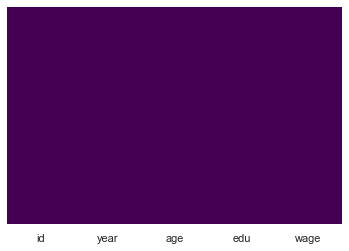

In [110]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

We can also check the column-wise distribution of null values:

In [111]:
print(df.isnull().sum())

id      0
year    0
age     0
edu     0
wage    0
dtype: int64


In this dataset, there are no missing values present.

If we observe **missing values** in the df, we could drop them all together with this code:

`df = df.dropna()`

However, be careful not to drop many observations if just one variable is the cause for the
 missing values. In that case, it could be reasonable to only drop the variable:

`df = df.drop('variable', axis=1)`

However, we will usually use other methods to fill in missing values (e.g. imputate using the mean)

## 3 Transform data

### 3.1 Descriptive statistics

First, we obtain some common statistics:

In [112]:
# summary statistics for all numerical columns
df.describe()

,age,wage
count,3000.000000,3000.000000
mean,42.414667,111.703608
std,11.542406,41.728595
min,18.000000,20.085537
25%,33.750000,85.383940
50%,42.000000,104.921507
75%,51.000000,128.680488
max,80.000000,318.342430


In [113]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,id,year,edu
count,3000,3000,3000
unique,3000,7,5
top,7373,2003,2. HS Grad
freq,1,513,971


Compare summary statistics for specific groups in the data:

In [114]:
# summary statistics by groups
df['age'].groupby(df['edu']).describe()

,count,mean,std,min,25%,50%,75%,max
edu,,,,,,,,
1. < HS Grad,268.0,41.794776,12.611111,18.0,33.0,41.5,50.25,75.0
2. HS Grad,971.0,42.217302,12.023480,18.0,33.0,42.0,50.00,80.0
3. Some College,650.0,40.887692,11.523327,18.0,32.0,40.0,49.00,80.0
4. College Grad,685.0,42.773723,10.902406,22.0,34.0,43.0,51.00,76.0
5. Advanced Degree,426.0,45.007042,10.263468,25.0,38.0,44.0,53.00,76.0


Some examples of how to calculate simple statistics:

In [115]:
# calculation of the mean (e.g. for age)
age_mean = df["age"].mean()

# calculation of the median (e.g. for age)
age_median =  df["age"].median()

# print the result (e.g., age_mean)
print('The precise mean of age is', age_mean)

# print the rounded result
print('The rounded mean of age is', round(age_mean))

# print the round result (to two decimals) (this is the preferred option)
print('The rounded mean of age with two decimals is', round(age_mean, 2))

# use a function inside print()
print('The median of age is', df["age"].median())

The precise mean of age is 42.41466666666667
The rounded mean of age is 42
The rounded mean of age with two decimals is 42.41
The median of age is 42.0


In [116]:
# calculation of the mode
df['age'].mode()

0    40
dtype: int64

In [117]:
# quantiles
df['age'].quantile([.25, .5, .75])

0.25    33.75
0.50    42.00
0.75    51.00
Name: age, dtype: float64

In [118]:
# Range
df['age'].max() - df['age'].min()

62

In [119]:
# standard deviation
round(df['age'].std(),2)


11.54

## 4. Visualize data

### 4.1 Distribution of Variables

How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous.
The excellent site [From Data to Viz](https://www.data-to-viz.com/) leads you to the most appropriate graph for your
data. It also links to the code to build it and lists common caveats you should avoid.

For example, to examine the distribution of a categorical variable, we could use a bar or count plot.

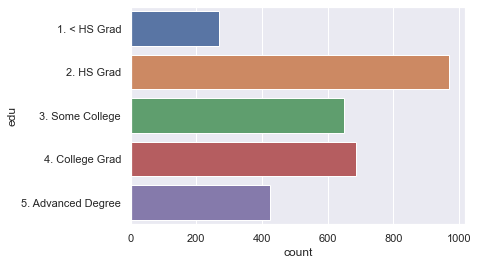

In [130]:
# horizontal count plot (show the counts of observations in each categorical bin)
sns.countplot(y='edu', data=df)

A variable is **continuous** if it can take any of an infinite set of ordered values.

To examine the distribution of a continuous variable, we could use a **histogram**:

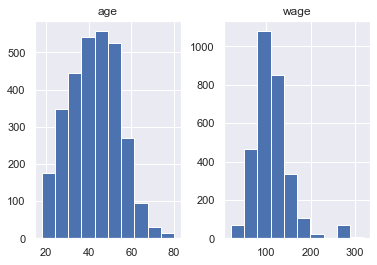

In [121]:
# Pandas histogram of all numerical values
df.hist();

Seaborne shows a default plot with a kernel density estimate and histogram with bin size determined automatically
with a reference rule:

/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


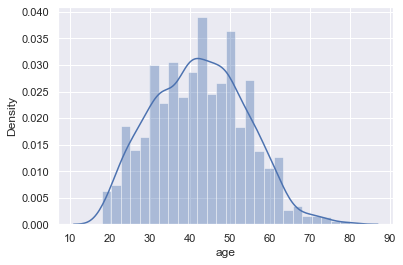

In [122]:
# histogram with seaborn 
sns.distplot(df.age);

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is
the **boxplot**. A boxplot is a type of visual shorthand for a distribution
of values that is popular among statisticians. Each boxplot consists of:

- A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR).
- In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution.
- These three lines give you a sense of the spread of the distribution
- Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.
- A line (or whisker) that extends from each end of the box and goes to the
farthest non-outlier point in the distribution.

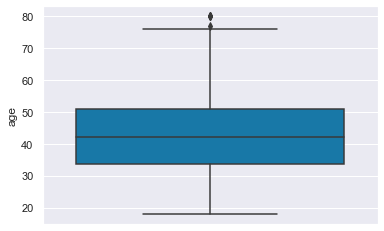

In [123]:
# boxplot 
sns.boxplot(y='age',data=df, palette='winter');

<AxesSubplot:xlabel='age', ylabel='edu'>

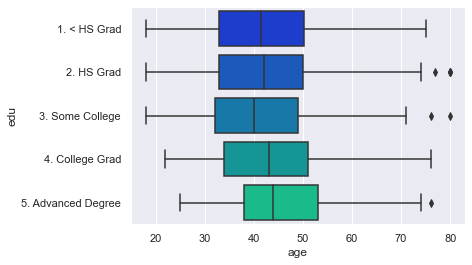

In [124]:
# boxplot for different groups
sns.boxplot(y='edu',x='age',data=df, palette='winter')

We see much less information about the distribution, but the boxplots are much more compact,
so we can more easily compare them (and fit more on one plot).

### 4.2 Relationship between variables

A great way to visualise the covariation between two continuous variables is to draw a scatterplot.
You can see covariation as a pattern in the points. We will cover more options to test for relationships in variables
(e.g., correlation) in the following applications.

/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='wage'>

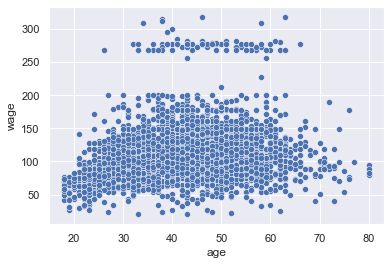

In [125]:
sns.scatterplot('age', 'wage', data=df)

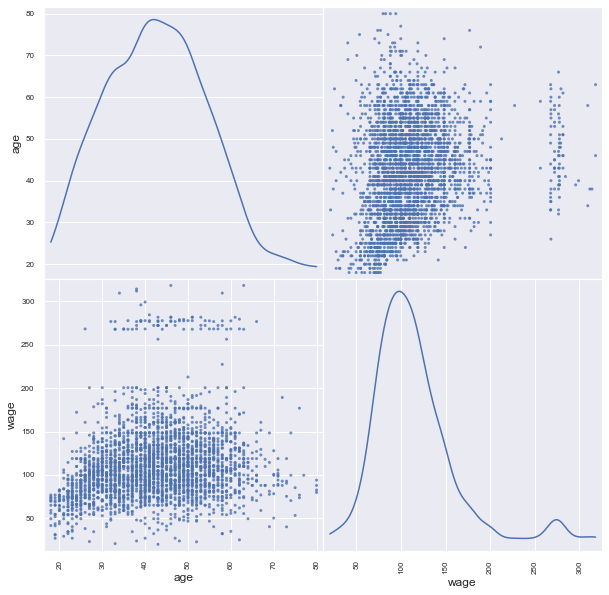

In [126]:
# plot all numerical variables in a scatter matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='kde');

## 5 Model

We cover the modelling process in our next applications

---
---

### Save data

In [127]:
# save as csv-file
# df.to_csv(PATH + 'df_wage.csv')

### Load data

In [128]:
# Load the csv data files into pandas dataframes
# PATH = '/Users/jankirenz/Dropbox/Data/' 
# df = pd.read_csv(PATH + 'df_wage.csv')

*Sources*

*James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An introduction to statistical learning. New York: Springer.*
*Wickham, H., & Grolemund, G. (2016). R for data science: import, tidy, transform, visualize, and model data. O'Reilly Media, Inc.*